1.  Can we use Bagging for regression problems ?
 - Yes, Bagging (Bootstrap Aggregating) can definitely be used for regression problems.

2. What is the difference between multiple model training and single model training ?
 - Single model training refers to the process of training one machine learning model on the entire training dataset to learn patterns and make predictions.
 The model is trained using a single algorithm (e.g., Decision Tree, Linear Regression, SVM), and its performance depends solely on how well this one model generalizes to unseen data.

 - Multiple model training, also known as ensemble learning, refers to the process of training multiple models—either of the same type (homogeneous) or different types (heterogeneous)—and combining their predictions to improve accuracy, robustness, and generalization.
Common techniques include Bagging, Boosting, and Stacking, where the final prediction is made by averaging, voting, or using a meta-model.

3. Explain the concept of feature randomness in Random Forest.
 - Feature randomness means that at each split in a tree, only a random subset of features is considered. This increases diversity among trees in the forest, reduces correlation between them, and improves overall model performance.

4. What is OOB (Out-of-Bag) Score?
 - OOB score is an internal validation method in Bagging and Random Forest. Since each tree is trained on a bootstrap sample, about one-third of the data is left out. These "out-of-bag" samples are used to estimate the model’s accuracy without needing a separate validation set.

5. How can you measure the importance of features in a Random Forest model?
 - Feature importance is measured by how much a feature decreases impurity (e.g., Gini or MSE) across all trees. Features contributing more to splitting nodes and reducing error are considered more important.

6. Explain the working principle of a Bagging Classifier.
 - Bagging Classifier trains multiple base classifiers on different random subsets (with replacement) of the data. Final prediction is made by majority voting (classification) or averaging (regression). It reduces overfitting by combining diverse models.

7. How do you evaluate a Bagging Classifier’s performance?
 - Performance is evaluated using metrics like accuracy, precision, recall, F1-score, and AUC, depending on the problem. OOB score or cross-validation can also be used to assess generalization.

8. How does a Bagging Regressor work?
 - Bagging Regressor trains multiple base regressors (like Decision Trees) on bootstrapped subsets. The final prediction is the average of predictions from all models. This ensemble approach reduces variance and improves robustness.

9. What is the main advantage of ensemble techniques?
 - The main advantage is improved accuracy and robustness. Ensemble methods combine multiple models to reduce overfitting, handle noise, and generalize better to unseen data.

10. What is the main challenge of ensemble methods?
 - The main challenges include increased complexity, longer training time, and reduced interpretability. Managing and tuning multiple models is computationally more expensive.

11. Explain the key idea behind ensemble techniques.
 - The key idea is to combine multiple weak learners (models that perform slightly better than random) to form a strong learner with high predictive power. Aggregation reduces errors like bias and variance.

12. What is a Random Forest Classifier?
 - It is an ensemble classifier that builds multiple decision trees using bagging and feature randomness. Final prediction is made using majority voting. It reduces overfitting and increases prediction accuracy.

13. What are the main types of ensemble techniques?
 - Bagging - Random Forest

 - Boosting -  AdaBoost, XGBoost

 - Stacking - Combines predictions using a meta-learner

14. What is ensemble learning in machine learning?
 - Ensemble learning is a technique where multiple models are combined to solve a problem. The goal is to produce a stronger and more accurate model than any individual one.

15. When should we avoid using ensemble methods?
 - Avoid when:

    The base model already performs well.

    You need high interpretability.

    Resources are limited (ensembles are computationally heavy).

    The dataset is small, and ensemble may overfit.

16. How does Bagging help in reducing overfitting?
 - Bagging reduces overfitting by training models on different subsets of data and combining their predictions. This smooths out model errors and reduces variance.

17. Why is Random Forest better than a single Decision Tree?
 - Random Forest reduces overfitting, improves accuracy, and handles noise better by averaging multiple trees trained with different data and features. A single decision tree is more prone to overfitting.

18. What is the role of bootstrap sampling in Bagging?
 - Bootstrap sampling creates random datasets with replacement from the original dataset. Each model in the ensemble is trained on a different sample, which increases diversity and reduces variance.

19.  What are some real-world applications of ensemble techniques ?
 - Credit scoring
 - Fraud detection
 - Medical diagnosis
 - Spam filtering
 - Recommendation systems
 - Stock market prediction

20.
 - Bagging is an ensemble learning technique that trains multiple models independently on different random subsets of the training data (with replacement) and then combines their predictions by voting (classification) or averaging (regression)
Its main goal is to reduce variance and improve model stability.
 - Boosting is an ensemble technique that builds models sequentially, where each new model is trained to correct the errors made by the previous ones.
The final prediction is made by combining the outputs of all models, usually using weighted voting or averaging.
Boosting mainly aims to reduce bias and improve accuracy.

In [3]:
# 1. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_model.fit(X_train, y_train)
y_pred = bag_model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))

Bagging Classifier Accuracy: 0.87


In [5]:
# Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)



Bagging Regressor MSE: 9168.544481446783


In [6]:
 # Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False).head(10))

                 Feature  Importance
23            worst area    0.139357
27  worst concave points    0.132225
7    mean concave points    0.107046
20          worst radius    0.082848
22       worst perimeter    0.080850
2         mean perimeter    0.067990
6         mean concavity    0.066917
3              mean area    0.060462
26       worst concavity    0.037339
0            mean radius    0.034843


In [7]:
# Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X, y = make_regression(n_samples=1000, n_features=10, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))

# Single Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))

Random Forest MSE: 2883.274253249711
Decision Tree MSE: 6902.133005195953


In [9]:
# Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier


OOB Score: 0.895


In [12]:
# Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

bag_svm = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
bag_svm.fit(X_train, y_train)
print("Bagging Classifier with SVM Accuracy:", bag_svm.score(X_test, y_test))

Bagging Classifier with SVM Accuracy: 0.8433333333333334


In [14]:
# Train a Random Forest Classifier with different numbers of trees and compare accuracy

Accuracy with 10 trees: 0.8333333333333334
Accuracy with 50 trees: 0.85
Accuracy with 100 trees: 0.8566666666666667
Accuracy with 200 trees: 0.86


In [16]:
#Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

bag_lr = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=10, random_state=42)
bag_lr.fit(X_train, y_train)
probs = bag_lr.predict_proba(X_test)[:, 1]
print("AUC Score:", roc_auc_score(y_test, probs))

AUC Score: 0.9136818687430479


In [17]:
#Train a Random Forest Regressor and analyze feature importance scores
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
print("Top 5 Feature Importances:", rf_reg.feature_importances_[:5])

Top 5 Feature Importances: [0.00953961 0.00961989 0.01203543 0.00909707 0.0069463 ]


In [27]:
#Train an ensemble model using both Bagging and Random Forest and compare accuracy
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Models
# Bagging with Decision Trees as base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                  n_estimators=100, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 5: Train Models
bagging_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Step 6: Predict
y_pred_bagging = bagging_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Step 7: Accuracy Comparison
acc_bagging = accuracy_score(y_test, y_pred_bagging)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("🔵 Bagging Classifier Accuracy:", round(acc_bagging * 100, 2), "%")
print("🟢 Random Forest Accuracy:", round(acc_rf * 100, 2), "%")

# Optional: Show Detailed Report
print("\n📋 Classification Report (Bagging):\n", classification_report(y_test, y_pred_bagging))
print("📋 Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))


🔵 Bagging Classifier Accuracy: 95.61 %
🟢 Random Forest Accuracy: 96.49 %

📋 Classification Report (Bagging):
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

📋 Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [19]:
#Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Best accuracy found:  0.8956934815303915


In [20]:
#Train a Bagging Regressor with different numbers of base estimators and compare performance


MSE with 10 estimators: 10581.27268546868
MSE with 50 estimators: 9168.544481446783
MSE with 100 estimators: 9284.412597442823
MSE with 200 estimators: 9025.66748772832


In [22]:
#Train a Random Forest Classifier and analyze misclassified samples
import numpy as np

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

misclassified_indices = np.where(y_test != y_pred)[0]
print("Indices of misclassified samples:", misclassified_indices)
print("Number of misclassified samples:", len(misclassified_indices))

Indices of misclassified samples: [  2   8  14  19  27  30  43  45  57  59  94  99 107 112 113 127 128 159
 162 163 171 173 184 216 217 220 230 231 234 235 245 246 247 253 264 266
 269 275 277 292 295 297 299]
Number of misclassified samples: 43


In [23]:
#Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Classifier
bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag_clf.fit(X_train, y_train)
bag_pred = bag_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, bag_pred))

# Single Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, tree_pred))

Bagging Classifier Accuracy: 0.87
Decision Tree Classifier Accuracy: 0.8566666666666667


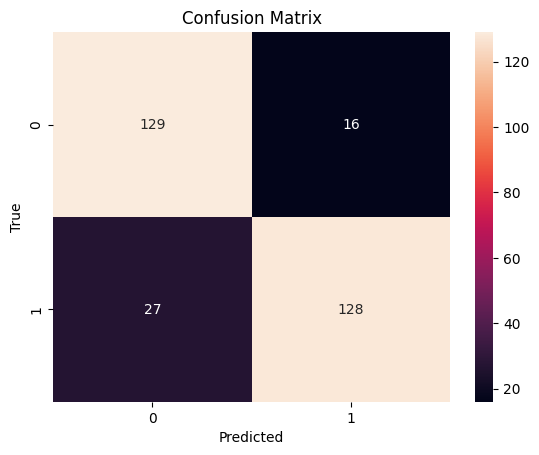

In [24]:
#Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
#Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

Stacking Classifier Accuracy: 0.8533333333333334


In [29]:
#Train a Random Forest Classifier and print the top 5 most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
top_indices = importances.argsort()[::-1][:5]

print("Top 5 most important features:")
for i in top_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

mean compactness: 0.3229
symmetry error: 0.2071
mean texture: 0.0957
smoothness error: 0.0823
texture error: 0.0292


In [31]:
#Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.metrics import classification_report

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       145
           1       0.89      0.86      0.87       155

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [32]:
#Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
for depth in [5, 10, 20, None]:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    print(f"max_depth={depth}, Accuracy={rf.score(X_test, y_test)}")

max_depth=5, Accuracy=0.85
max_depth=10, Accuracy=0.8633333333333333
max_depth=20, Accuracy=0.8566666666666667
max_depth=None, Accuracy=0.8566666666666667


In [34]:
#Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare
#performance
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=base, n_estimators=10, random_state=42)
    model.fit(X_train, y_train)
    print(f"{type(base).__name__}: MSE = {mean_squared_error(y_test, model.predict(X_test))}")

DecisionTreeRegressor: MSE = 0.10300000000000001
KNeighborsRegressor: MSE = 0.13680533333333333


In [35]:
#Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.9244493882091211


In [37]:
 #Train a Bagging Classifier and evaluate its performance using cross-validatio.
 from sklearn.model_selection import cross_val_score

bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
scores = cross_val_score(bag, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validation scores: [0.94  0.905 0.9   0.92  0.885]
Average CV Score: 0.9099999999999999


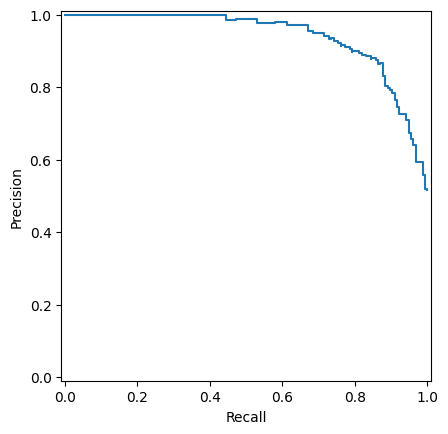

In [38]:
 #Train a Random Forest Classifier and plot the Precision-Recall curv
 from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

y_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

In [39]:
#Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
stack = StackingClassifier(estimators=[
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
], final_estimator=LogisticRegression())

stack.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stack.score(X_test, y_test))

Stacking Classifier Accuracy: 0.8566666666666667


In [41]:
#Train a Bagging Regressor with different levels of bootstrap samples and compare performance
for bootstrap in [True, False]:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"Bootstrap={bootstrap}: MSE = {mse}")

Bootstrap=True: MSE = 0.10449466666666667
Bootstrap=False: MSE = 0.13052933333333333
